# Titanic “drawingtitanic” grafiek — exact zoals jouw voorbeeld (percentages)

In jouw voorbeeld staat de **y-as van 0 tot 100**. Dat betekent: we tekenen **percentages** (geen absolute aantallen).

Per **klasse (Pclass)** tonen we **twee balken**:
- links: **male**
- rechts: **female**

Elke balk is **gestapeld** en telt op tot **100%**:
- **overleefd**
- **niet overleefd**

Op het einde saven we de grafiek als PNG.


## Stap 1 — Libraries importeren
- `pandas` voor het groeperen en omzetten naar percentages  
- `matplotlib` voor de grafiek en het opslaan als PNG


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Stap 2 — Dataset laden
We lezen `Titanic-Dataset.csv` in.


In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Stap 3 — Tellen per (klasse, geslacht, overleefd)
We tellen eerst **aantallen** per combinatie van:
- `Pclass`
- `Sex`
- `Survived`

Daarna zetten we `Survived` in kolommen (0 en 1) met `unstack()`.


In [3]:
counts = (
    df.groupby(['Pclass', 'Sex', 'Survived'])
      .size()
      .unstack(fill_value=0)
)
counts

Survived         0   1
Pclass Sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

## Stap 4 — Omzetten naar percentages (zodat elke balk tot 100% optelt)
Voor jouw grafiek willen we dat elke balk (bv. male in klasse 1) optelt tot **100%**.
Dus delen we per `(Pclass, Sex)` door het totaal van die groep.


In [4]:
totals = counts.sum(axis=1)
pct = counts.div(totals, axis=0) * 100
pct

Survived               0          1
Pclass Sex                         
1      female   3.191489  96.808511
       male    63.114754  36.885246
2      female   7.894737  92.105263
       male    84.259259  15.740741
3      female  50.000000  50.000000
       male    86.455331  13.544669

## Stap 5 — Waarden klaarzetten voor de 4 gestapelde reeksen
We halen per klasse 4 arrays op:
- male overleefd / male niet overleefd
- female overleefd / female niet overleefd


In [ ]:
#classes = sorted(df['Pclass'].dropna().unique())
classes = sorted(df['Pclass'].unique())



male_surv = [pct.loc[(c, 'male'),   1] for c in classes]
male_not  = [pct.loc[(c, 'male'),   0] for c in classes]

fem_surv  = [pct.loc[(c, 'female'), 1] for c in classes]
fem_not   = [pct.loc[(c, 'female'), 0] for c in classes]

male_surv, male_not, fem_surv, fem_not

([np.float64(36.885245901639344),
  np.float64(15.74074074074074),
  np.float64(13.544668587896252)],
 [np.float64(63.114754098360656),
  np.float64(84.25925925925925),
  np.float64(86.45533141210375)],
 [np.float64(96.80851063829788),
  np.float64(92.10526315789474),
  np.float64(50.0)],
 [np.float64(3.1914893617021276),
  np.float64(7.894736842105263),
  np.float64(50.0)])

## Stap 6 — Grafiek tekenen (zoals jouw voorbeeld)
Trucje voor “stacked bars”:
- teken eerst de onderste laag
- teken daarna de bovenste laag met `bottom=...`

We zetten de y-as expliciet op `0..100`.


Stap-voor-stap uitleg van wat de code doet

x = range(len(classes))
Dit maakt een eenvoudige reeks getallen die dient als de basisposities voor de balken op de x-as. Elk getal komt overeen met één passagiersklasse.

width = 0.35
Dit bepaalt de breedte van elke afzonderlijke balk in de grafiek.

plt.figure(figsize=(10, 6))
Er wordt een nieuwe figuur aangemaakt met nieuwe dimenties

Mannelijke balken tekenen

plt.bar(x, male_surv, width)
Dit tekent de eerste set balken voor mannen: het percentage dat per klasse heeft overleefd.

plt.bar(x, male_not, width, bottom=male_surv)
Dit tekent de balken voor mannen die niet overleefden.
bottom=male_surv: daardoor wordt “niet overleefd” bovenop “overleefd” geplaatst

Vrouwelijke balken tekenen

x2 = [i + width for i in x]
Om de vrouwelijke balken naast de mannelijke te plaatsen (en niet er bovenop), worden nieuwe x-posities berekend door elke oorspronkelijke positie een stukje naar rechts te verschuiven.

Daarna doen de volgende twee plt.bar()-calls hetzelfde als bij mannen, maar dan met de nieuwe posities x2, zodat vrouwen een aparte gestapelde balk per klasse krijgen.

plt.xticks(...)
Dit zet de labels op de x-as en positioneert ze in het midden van elk paar (male/female) balken.

Labels en titel (xlabel, ylabel, title)
Deze labels zeggen wat de grafiek voorstelt.

plt.ylim(0, 100)
De y-as wordt vastgezet van 0 tot 100, omdat we met percentages werken.

plt.legend(...)
Er wordt een legenda toegevoegd om uit te leggen wat de verschillende kleuren voorstellen

plt.tight_layout() en plt.show()
tight_layout() past de layout aan zodat labels en legenda niet overlappen of buiten beeld vallen, en show() toont de grafiek.

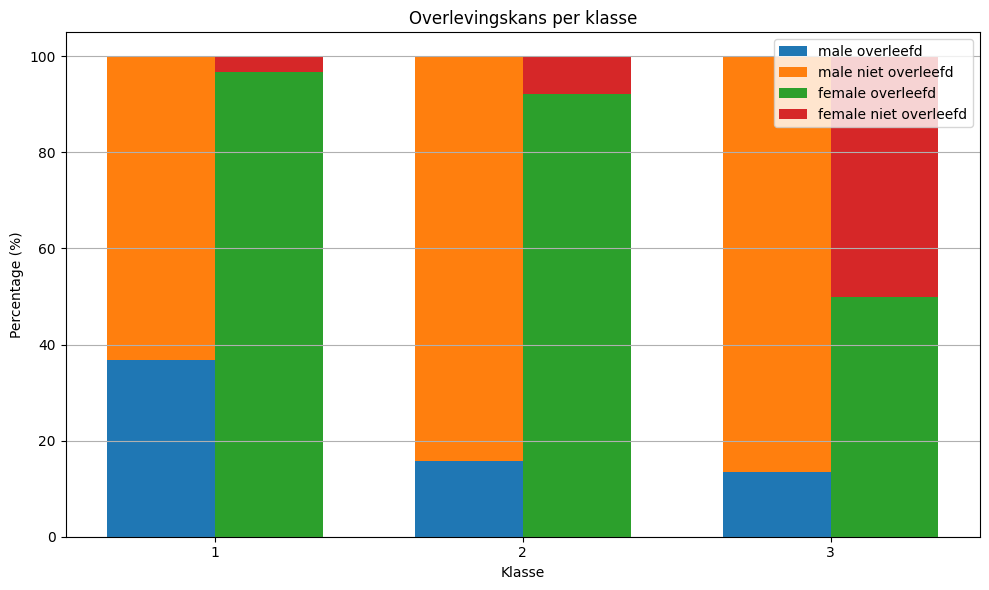

In [10]:
x = range(len(classes))
width = 0.35

plt.figure(figsize=(10, 6))

# Male (links)
plt.bar(x, male_surv, width)
plt.bar(x, male_not, width, bottom=male_surv)

# Female (rechts)
x2 = [i + width for i in x]
plt.bar(x2, fem_surv, width)
plt.bar(x2, fem_not, width, bottom=fem_surv)

plt.xticks([i + width/2 for i in x], classes)
plt.xlabel("Klasse")
plt.ylabel("Percentage (%)")
plt.title("Overlevingskans per klasse")
#plt.ylim(0, 100)
plt.grid(axis='y')

plt.legend([
    'male overleefd',
    'male niet overleefd',
    'female overleefd',
    'female niet overleefd'
])

plt.tight_layout()
plt.show()

## Stap 7 — Opslaan als PNG
We saven de figuur als PNG met `dpi=300` (mooie resolutie).


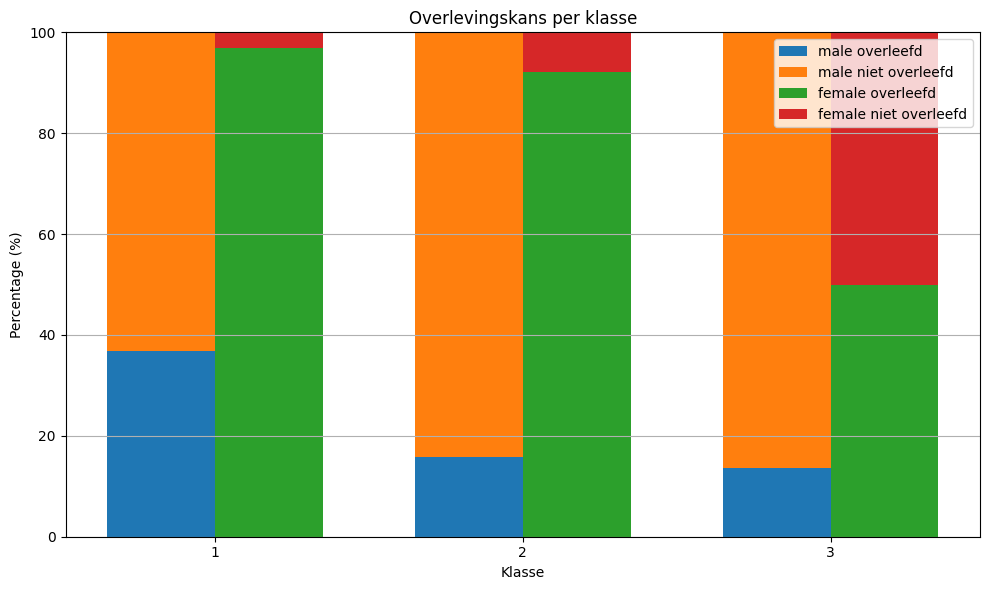

'drawingtitanic_like_example.png'

In [7]:
# opnieuw tekenen + saven
x = range(len(classes))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x, male_surv, width)
plt.bar(x, male_not, width, bottom=male_surv)

x2 = [i + width for i in x]
plt.bar(x2, fem_surv, width)
plt.bar(x2, fem_not, width, bottom=fem_surv)

plt.xticks([i + width/2 for i in x], classes)
plt.xlabel("Klasse")
plt.ylabel("Percentage (%)")
plt.title("Overlevingskans per klasse")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.legend(['male overleefd','male niet overleefd','female overleefd','female niet overleefd'])

plt.tight_layout()

png_path = 'drawingtitanic_like_example.png'
plt.savefig(png_path, dpi=300)
plt.show()

png_path